In [84]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import classification_report#这个包是评价报告
from sklearn.model_selection import train_test_split
import copy
%matplotlib inline

In [85]:
df = pd.read_csv("spiral_data/2class.txt",delimiter=" ",names=["x1","x2","y"])
x1 = df["x1"]
x2 = df["x2"]
X_train = np.array(df[["x1","x2"]])
y_train = np.array(df["y"]).reshape([-1,1])
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.1,random_state=4)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1801, 2), (201, 2), (1801, 1), (201, 1))

<Figure size 720x576 with 0 Axes>

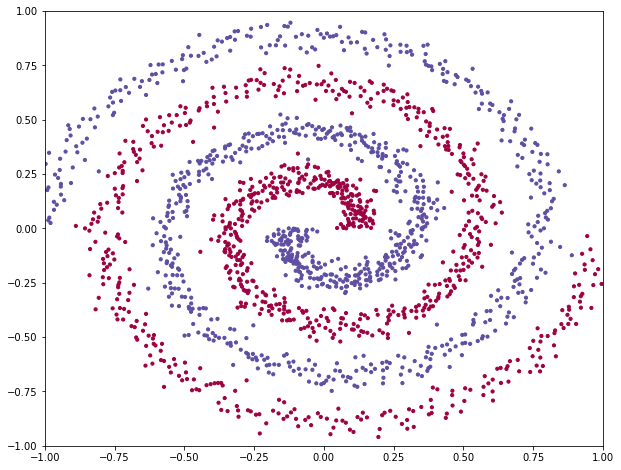

In [86]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.subplots_adjust(wspace =0, hspace =0.3)

fig = plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.reshape([-1]), s=10, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.savefig("2class.jpg")
plt.show()

In [87]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0,x)

def sigmoid_gradient(z):
    return np.multiply(sigmoid(z), 1 - sigmoid(z))


In [88]:
input_size = 2
hidden_size = 100
output_size = 1
std = 1
alpha = 0.5
# rand函数根据给定维度生成[0,1)之间的数据，shape(input_size, hidden_size)
W1 = std * np.random.randn(input_size, hidden_size)   #(2,10)
b1 = np.zeros((1, hidden_size))                       #(1,10)
W2 = std * np.random.randn(hidden_size,output_size)   #(10,1)
b2 = np.zeros((1, output_size))                       #(1,1)

params = {}
params["W1"] = W1
params["b1"] = b1
params["W2"] = W2
params["b2"] = b2

def accuracy(y,t):
    y[y <= 0.5] = 0
    y[y > 0.5] = 1
    acc = np.mean(y == t)
    return acc

# output
def predict(X,params):
    z1 = np.dot(X,params["W1"]) + params["b1"]                     
    a1 = sigmoid(z1)                
    z2 = np.dot(a1,params["W2"]) + params["b2"]     
    a2 = sigmoid(z2)
    a2[a2 <= 0.5] = 0
    a2[a2 > 0.5] = 1
    return a2

def computeLoss(y,t): # y->predict value t->true value
    return -np.mean(t*np.log(y+1e-5) + (1-t)*np.log(1-y+1e-5))

In [89]:
def forward_propagation(params,X):
    z1 = np.dot(X,params["W1"]) + params["b1"]                     
    a1 = sigmoid(z1)                
    z2 = np.dot(a1,params["W2"]) + params["b2"]     
    a2 = sigmoid(z2)     
    return z1,a1,z2,a2
# z1,a1,z2,a2 = forward_propagation(params,X_train)

### 绘制决策边界 https://blog.csdn.net/qinhanmin2010/article/details/65692760

In [90]:
def savePic(params,X,y,figname):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = predict(np.c_[xx.ravel(), yy.ravel()],params)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    plt.savefig(figname+".jpeg")
    plt.close()

In [91]:
def train(X,y,X_t,y_t,params,iterations):
    best_acc = -1
    best_params = {}
    loss_history = []
    acc_history = []
    acc_t_history = []
    loss_t_history = []
    m = X.shape[0]
    
    for i in range(iterations):
        
        z1,a1,z2,a2 = forward_propagation(params,X)
        tz1,ta1,tz2,ta2 = forward_propagation(params,X_t)
        
        dz2 = a2 - y
        dW2 = (1/m)*np.dot(a1.T,dz2) 
        db2 = (1/m)*np.sum(dz2,axis=0,keepdims=True) 
        dz1 = np.dot(dz2,params["W2"].T)*sigmoid_gradient(z1) 
        dW1 = (1/m)*np.dot(X_train.T,dz1)
        db1 = (1/m)*np.sum(dz1,axis=0,keepdims=True)    
        
        loss = computeLoss(a2,y)
        loss_t = computeLoss(ta2,y_t)

        acc = accuracy(a2,y)
        acc_t = accuracy(ta2,y_t)
        
        if i % 1000 == 0:
            loss_history.append(loss)
            acc_history.append(acc)

            loss_t_history.append(loss_t)
            acc_t_history.append(acc_t)
            savePic(params,X,y.reshape([-1]),str(i))
            savePic(params,X_t,y_t.reshape([-1]),str(i)+"t")
            print("iteration %d: loss %f acc %f" % (i, loss,acc))    
       
        
        if acc > best_acc:
            best_acc = acc 
            best_params = copy.deepcopy(params)  # 深复制 指向的不是同一内存空间，对name_info做任何修改，info3的值都不会变化


        # perform a parameter update
        params["W1"] += -alpha * dW1
        params["b1"] += -alpha * db1
        params["W2"] += -alpha * dW2
        params["b2"] += -alpha * db2
        
    return {   
        'loss_history': loss_history,   
        'acc_history': acc_history,   
        'loss_t_history': loss_t_history,   
        'acc_t_history': acc_t_history, 
        "params": best_params,
        "best_acc":best_acc,
    } 

In [92]:
stats = train(X_train,y_train,X_test,y_test,params,70000)

iteration 0: loss 1.162013 acc 0.566907
iteration 1000: loss 0.664798 acc 0.525264
iteration 2000: loss 0.641137 acc 0.559689
iteration 3000: loss 0.631072 acc 0.533592
iteration 4000: loss 0.629084 acc 0.531927
iteration 5000: loss 0.628434 acc 0.531927
iteration 6000: loss 0.627956 acc 0.532482
iteration 7000: loss 0.627517 acc 0.533592
iteration 8000: loss 0.627092 acc 0.533037
iteration 9000: loss 0.626670 acc 0.533037
iteration 10000: loss 0.627318 acc 0.544142
iteration 11000: loss 0.627124 acc 0.546918
iteration 12000: loss 0.626210 acc 0.545253
iteration 13000: loss 0.625829 acc 0.545808
iteration 14000: loss 0.625319 acc 0.546918
iteration 15000: loss 0.624750 acc 0.544697
iteration 16000: loss 0.624166 acc 0.544697
iteration 17000: loss 0.623552 acc 0.547474
iteration 18000: loss 0.622911 acc 0.547474
iteration 19000: loss 0.622246 acc 0.548584
iteration 20000: loss 0.621556 acc 0.550805
iteration 21000: loss 0.620833 acc 0.552471
iteration 22000: loss 0.620067 acc 0.554137
i

In [93]:
stats["best_acc"]

0.9794558578567463

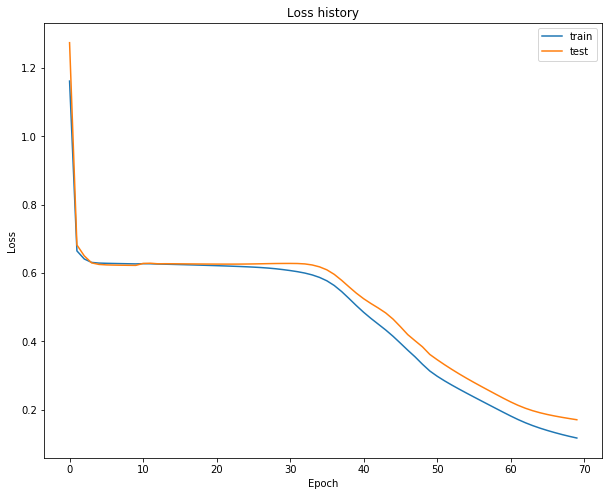

In [96]:
plt.plot(stats['loss_history'], label='train')
plt.plot(stats['loss_t_history'], label='test')
plt.title('Loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("loss.jpeg")
plt.show()

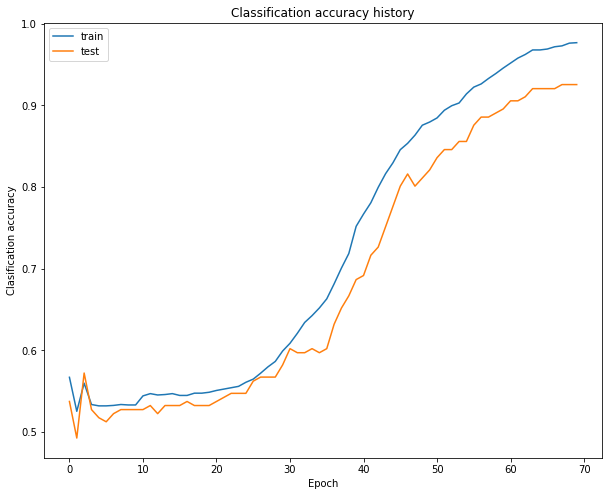

In [97]:
plt.plot(stats['acc_history'], label='train')
plt.plot(stats['acc_t_history'], label='test')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.savefig("acc.jpeg")

In [102]:
import imageio
outfilename = "train.gif" # 转化的GIF图片名称
filenames = []
for i in range(0,70000,1000):
    filename = str(i)+'.jpeg'
    filenames.append(filename)
frames = []
for image_name in filenames:
    im = imageio.imread(image_name)           
    frames.append(im)
imageio.mimsave(outfilename, frames, 'GIF', duration=0.3) 